# WISCONSIN BREAST CANCER DATASET 

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv("data2.csv")

In [3]:
dt.shape

(569, 33)

In [4]:
dt.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Removing unnecessary columns**

In [5]:
# removing id and unnamed: 32 column which is not necessary for our model
ds = dt.drop(['id','Unnamed: 32'],axis = 1)
ds.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
ds

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# add analisis of distributions by B or M here

**Replacing B/M for 1/0**

In [8]:
# https://datatofish.com/replace-values-pandas-dataframe/

ds["diagnosis"] = ds["diagnosis"].replace(["M"], ["1"])
ds["diagnosis"] = ds["diagnosis"].replace(["B"], ["0"])

In [141]:
np.unique(ds["diagnosis"], return_counts=True)

(array(['0', '1'], dtype=object), array([357, 212], dtype=int64))

In [9]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
pd.to_numeric(ds["diagnosis"])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

**Descriptive statistics**

In [10]:
pd.DataFrame.describe(ds)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Heatmap**

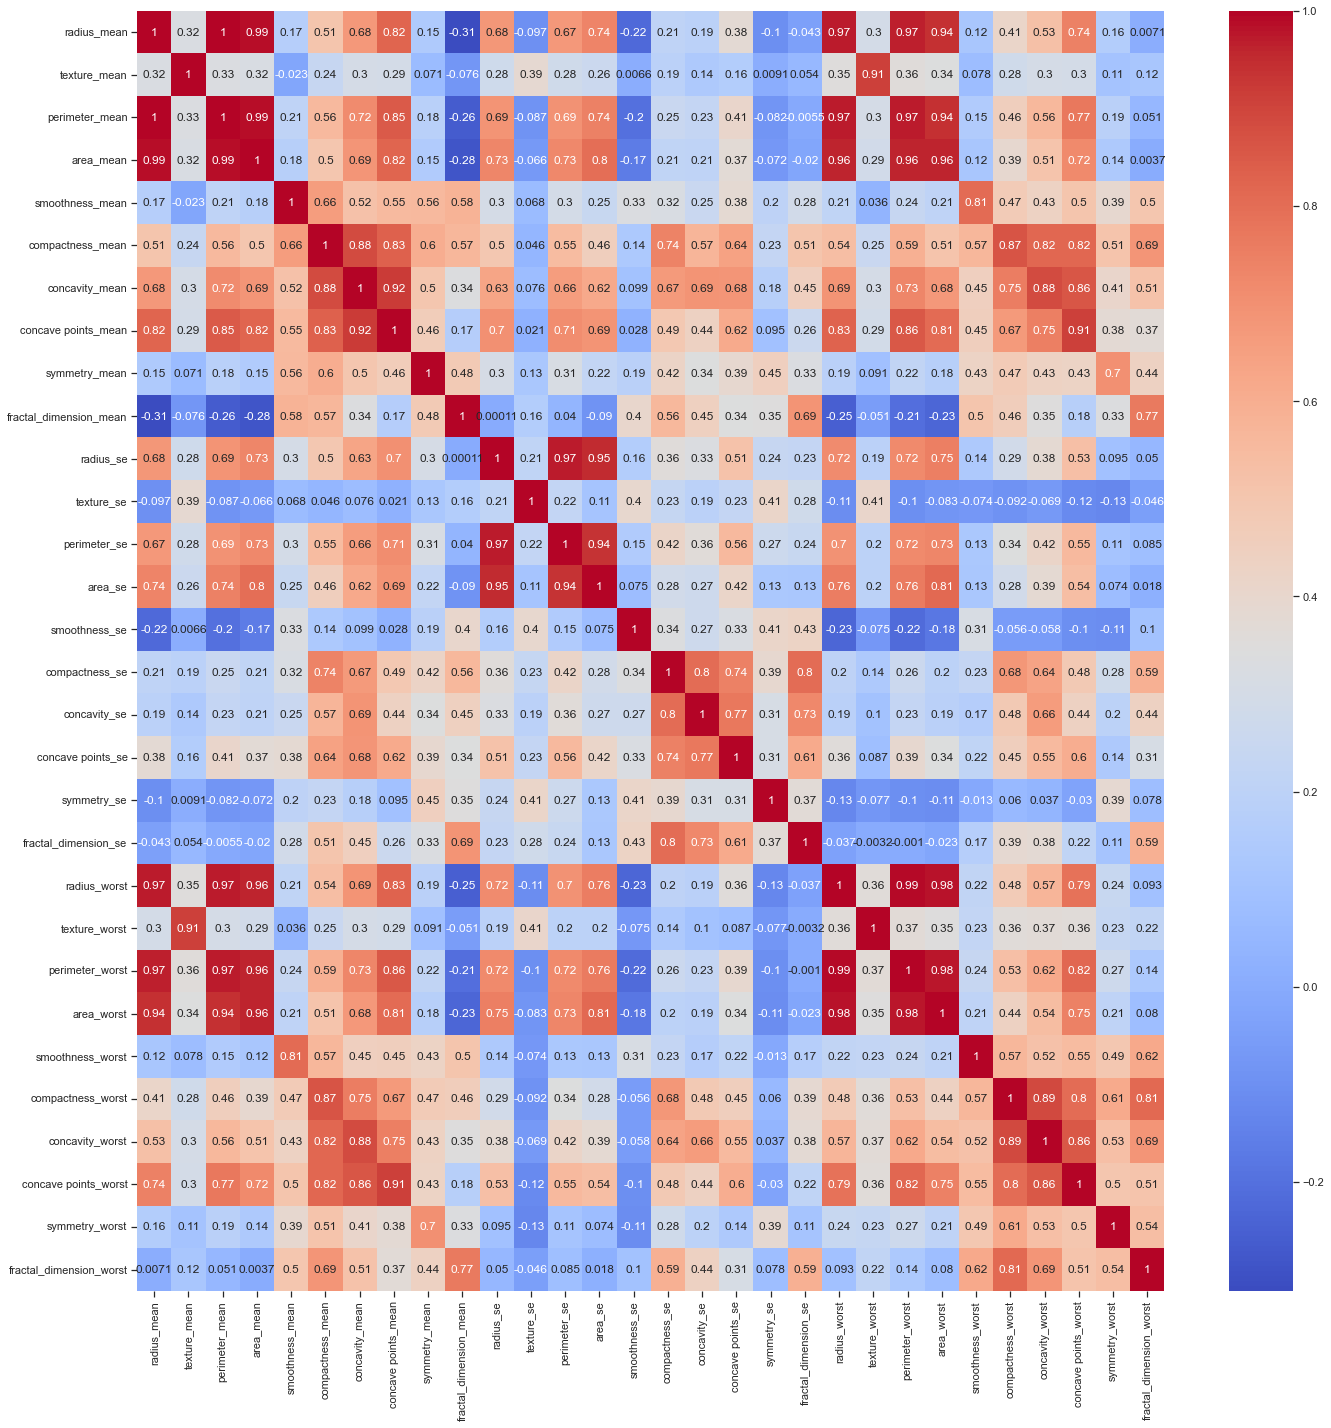

In [11]:
# Finding correlation among features using sns' heatmap
sns.set(style="ticks")
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(),annot=True,cmap='coolwarm')
plt.tight_layout()

**Data preprocessing**

In [12]:
# https://towardsdatascience.com/data-preprocessing-for-machine-learning-in-python-2d465f83f18c

# values with sd > 3 should be removed? 


**Number of bening and malignant samples**

In [13]:
b = ds[ds["diagnosis"] == '0'].shape[0]
m = ds[ds["diagnosis"] == '1'].shape[0]
dif = b-m

print("Bening samples:", b)
print("Malignant samples:", m)
print("Difference of samples:", dif)

Bening samples: 357
Malignant samples: 212
Difference of samples: 145


https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data
https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

Undersampling, oversampling and generating synthetic data

These methods are often presented as great ways to balance the dataset before fitting a classifier on it. In a few words, these methods act on the dataset as follows:

undersampling consists in sampling from the majority class in order to keep only a part of these points
oversampling consists in replicating some points from the minority class in order to increase its cardinality
generating synthetic data consists in creating new synthetic points from the minority class (see SMOTE method for example) to increase its cardinality

**Undersampling** CHECK FOR CORRELATION - HEATMAP

In [14]:
# Undersampling the bening tumor data

# "loc" to access all the rows with the diagnosis outcome "bening".(16)
dsb = ds.loc[ds["diagnosis"] == "0"]
dsm = ds.loc[ds["diagnosis"] == "1"]

# We pick 212 bening samples 
dsb_under = dsb.sample(212)

In [15]:
dsb_under

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
286,0,11.940,20.76,77.87,441.0,0.08605,0.10110,0.065740,0.037910,0.1588,...,13.240,27.29,92.20,546.1,0.11160,0.28130,0.23650,0.11550,0.2465,0.09981
68,0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
266,0,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,...,11.880,22.94,78.28,424.8,0.12130,0.25150,0.19160,0.07926,0.2940,0.07587
374,0,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.020310,0.1872,...,14.840,20.21,99.16,670.6,0.11050,0.20960,0.13460,0.06987,0.3323,0.07701
49,0,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,11.460,18.16,73.59,403.1,0.08853,0.07694,0.033440,0.015020,0.1411,...,12.680,21.61,82.69,489.8,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638
391,0,8.734,16.84,55.27,234.3,0.10390,0.07428,0.000000,0.000000,0.1985,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.00000,0.00000,0.2445,0.08865
458,0,13.000,25.13,82.61,520.2,0.08369,0.05073,0.012060,0.017620,0.1667,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
125,0,13.850,17.21,88.44,588.7,0.08785,0.06136,0.014200,0.011410,0.1614,...,15.490,23.58,100.30,725.9,0.11570,0.13500,0.08115,0.05104,0.2364,0.07182


In [16]:
# Concatenate bening and malignant samples
df = pd.concat([dsb_under, dsm], ignore_index=True)
pd.DataFrame.describe(df)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,14.793625,19.787241,96.663443,719.838915,0.097113,0.113122,0.104301,0.057033,0.183197,0.062858,...,17.243205,26.451981,114.132783,989.512500,0.134020,0.280168,0.310732,0.128835,0.296887,0.085643
std,3.726251,4.260790,25.702265,378.831743,0.013861,0.055593,0.083361,0.040999,0.028334,0.007210,...,5.133158,6.121376,35.643152,616.024427,0.023454,0.166002,0.214538,0.067671,0.066575,0.019153
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,12.087500,16.840000,77.915000,447.400000,0.086918,0.070495,0.035430,0.023670,0.163325,0.057465,...,13.300000,22.055000,86.372500,544.175000,0.117750,0.164375,0.145300,0.074475,0.254150,0.072447
50%,13.970000,19.470000,91.300000,601.400000,0.097045,0.105250,0.090460,0.050100,0.180900,0.061670,...,16.095000,26.040000,106.000000,787.950000,0.133250,0.237000,0.280450,0.122150,0.285450,0.080890
75%,17.312500,22.142500,114.200000,931.450000,0.106425,0.143650,0.152550,0.086260,0.197975,0.066553,...,20.585000,30.500000,137.950000,1302.500000,0.148500,0.372750,0.426075,0.182000,0.325800,0.094715
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Train the dataset**

In [17]:
# https://www.sharpsightlabs.com/blog/scikit-train_test_split/
# https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

from sklearn.model_selection import train_test_split
x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 10)


classifiers applied to the dataset

 https://www.researchgate.net/figure/Classifiers-performances-on-the-horse-colic-dataset-The-bold-numbers-are-the-highest_tbl5_359215133

 https://dergipark.org.tr/tr/download/article-file/615107
 
 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7351679/pdf/978-981-15-7205-0_Chapter_10.pdf
 
 https://ziyuan-shen.github.io/files/breast_cancer_prediction_report.pdf

SVM LINEAR
SVM POLYNOMIAL
SVM RADIAL BASIS
NN
NAIVE BAYES
J48
RANDOM FOREST
MULTILAYER PERCEPTRON

**Metrics to measure classification performance**

https://towardsdatascience.com/8-metrics-to-measure-classification-performance-984d9d7fd7aa

accuracy  
confusion matrix  
ROC  
Precision  
Recall  
f1 score  
kappa  
MCC  

**K Nearest Neighbors Classifier**

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

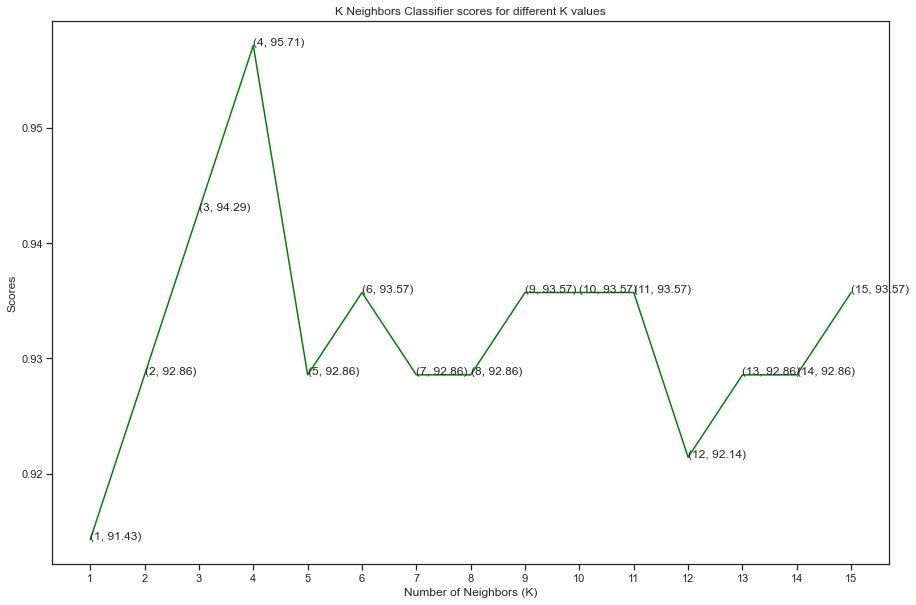

In [18]:
# https://towardsdatascience.com/k-nearest-neighbors-94395f445221

# Importing and fitting KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_values = []

for i in range (1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)# Predicting results using Test data set
    pred = knn.predict(x_test)    
    a = accuracy_score(pred,y_test)
    knn_values.append(a)

sns.set(style="ticks")
plt.figure(figsize=(15,10))
plt.plot([k for k in range(1, 16)], knn_values, color = 'green')
for i in range(1,16):
    plt.text(i, knn_values[i-1], (i, round(knn_values[i-1]*100,2)))
plt.xticks([i for i in range(1, 16)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.grid(False)
plt.title('K Neighbors Classifier scores for different K values')

In [19]:
# Knn accuracy:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)# Predicting results using Test data set
pred = knn.predict(x_test)
knn_acc = round((accuracy_score(pred,y_test))*100,2)
print("KNN accuracy:", knn_acc)
print()

# Knn recall

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

from sklearn.metrics import recall_score

#knn_mcc = (round(matthews_corrcoef(y_test,pred),2))*100

knn_rec = np.round(recall_score(y_test, pred, average=None)*100,2)
print("KNN recall:", knn_rec)
print()

# Knn precision

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

from sklearn.metrics import precision_score
knn_prec = np.round(precision_score(y_test, pred, average=None)*100,2)
print("KNN precision:", knn_prec)
print()

# Knn f1

# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn.metrics import f1_score
knn_f1 = np.round(f1_score(y_test, pred, average=None)*100,2)
print("KNN f1:", knn_f1)
print()

# knn Matthews correlation coefficient (MCC)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

from sklearn.metrics import matthews_corrcoef

knn_mcc = (round(matthews_corrcoef(y_test,pred),2))*100
print("KNN Matthews correlation coefficient:", knn_mcc)

KNN accuracy: 94.29

KNN recall: [91.78 97.01]

KNN precision: [97.1  91.55]

KNN f1: [94.37 94.2 ]

KNN Matthews correlation coefficient: 89.0


In [20]:
# Knn classification report

# View the classification report for test data and predictions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        73
           1       0.92      0.97      0.94        67

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



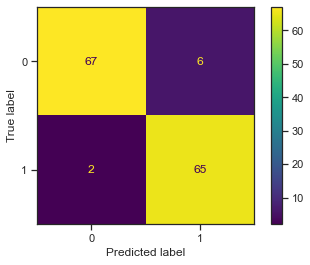

In [21]:
# Knn - Confusion Matrix visualization.

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
knn_cm = confusion_matrix(y_test, pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

**Logistic regression (LR)**

In [22]:
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=5000)
logisticRegr.fit(x_train, y_train)
pred_lr = logisticRegr.predict(x_test)

# Logistic regression accuracy:

lr_acc = round((logisticRegr.score(x_test, y_test))*100,2) 
print("Logistic regresion model accuracy:", lr_acc)
print()

# Logistic regression recall:

lr_rec = np.round((recall_score(y_test, pred_lr, average=None))*100,2)
print("Logistic regresion model recall:", lr_rec)
print()

# Logistic regression precision:

lr_prec = np.round((precision_score(y_test, pred_lr, average=None))*100,2)
print("Logistic regresion model precision:", lr_prec)
print()

# Logistic regression f1:

lr_f1 = np.round((f1_score(y_test, pred_lr, average=None))*100,2)
print("Logistic regresion model f1:", lr_f1)
print()

# Logistic regression Matthews correlation coefficient (MCC)

lr_mcc = (round(matthews_corrcoef(y_test,pred_lr),2))*100
print("Logistic regresion model MCC:", lr_mcc)
print()

Logistic regresion model accuracy: 95.71

Logistic regresion model recall: [ 91.78 100.  ]

Logistic regresion model precision: [100.    91.78]

Logistic regresion model f1: [95.71 95.71]

Logistic regresion model MCC: 92.0



In [23]:
# Logistic regression classification report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        73
           1       0.92      1.00      0.96        67

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



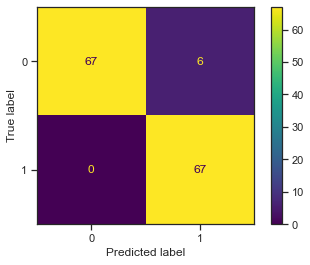

In [24]:
# Logistic regression - Confusion Matrix visualization.

lr_cm = confusion_matrix(y_test, pred_lr, labels=logisticRegr.classes_)
lrdisp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=logisticRegr.classes_)
lrdisp.plot()
plt.grid(False)
plt.show()

**Support Vector Classifier (SVC)**


In [25]:
# https://towardsdatascience.com/a-practical-introduction-to-support-vector-machines-from-scikit-learn-6e678cf1f228
# https://scikit-learn.org/stable/modules/svm.html

from sklearn import svm# Chooses the support vector machine algorithm for our classifier
clf = svm.SVC(kernel = "linear")# Training the classifier
clf_trained = clf.fit(x_train,y_train)# Scoring the classifier
clf_pred = clf_trained.predict(x_test)

# Support Vector Classifier accuracy

svc_acc = round(clf_trained.score(x_train,y_train)*100,2)
print("SVC accuracy:", svc_acc)
print()

# Support Vector Classifier precision

svc_prec = np.round((precision_score(y_test, clf_pred, average=None))*100,2)
print("SVC precision:", svc_prec)
print()

# Support Vector Classifier recall

svc_rec = np.round(recall_score(y_test, clf_pred, average=None)*100,2)
print("SVC recall:", svc_rec)
print()

# Support Vector Classifier f1

svc_f1 = np.round(f1_score(y_test, clf_pred, average=None)*100,2)
print("SVC f1:", svc_f1)
print()

# Support Vector Classifier - Matthews correlation coefficient (MCC)

svc_mcc = (round(matthews_corrcoef(y_test,clf_pred),2))*100
print("SVC MCC:", svc_mcc)

SVC accuracy: 95.77

SVC precision: [100.    93.06]

SVC recall: [ 93.15 100.  ]

SVC f1: [96.45 96.4 ]

SVC MCC: 93.0


In [26]:
#  Support Vector Classifier classification report:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        73
           1       0.93      1.00      0.96        67

    accuracy                           0.96       140
   macro avg       0.97      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



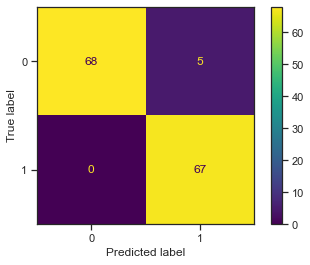

In [27]:
# Support Vector Classifier - Confusion Matrix visualization.

svc_cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)

svcdisp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=clf.classes_)

svcdisp.plot()
plt.grid(False)
plt.show()

**Decision tree classifier (DTC)**

In [28]:
# https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f

from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

# Decision tree classifier accuracy

dtc_acc = round(accuracy_score(y_test, y_pred_en)*100,2)
print("Decision tree classifier accuracy:", dtc_acc)
print()

# Decision tree classifier precision

dtc_prec = np.round((precision_score(y_test, y_pred_en, average=None))*100,2)
print("Decision tree classifier precision:", dtc_prec)
print()

# Decision tree classifier recall

dtc_rec = np.round((recall_score(y_test, y_pred_en, average=None))*100,2)
print("Decision tree classifier recall:",dtc_rec)
print()

# Decision tree classifier f1

dtc_f1 = np.round((f1_score(y_test, y_pred_en, average=None))*100,2)
print("Decision tree classifier f1:", dtc_f1)
print()

# Decision tree classifier - Matthews correlation coefficient (MCC)

dtc_mcc = (round(matthews_corrcoef(y_test, y_pred_en),2))*100
print("Decision tree classifier MCC:", dtc_mcc)

Decision tree classifier accuracy: 94.29

Decision tree classifier precision: [95.77 92.75]

Decision tree classifier recall: [93.15 95.52]

Decision tree classifier f1: [94.44 94.12]

Decision tree classifier MCC: 89.0


In [29]:
# Decision tree classifier - classification report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.93      0.96      0.94        67

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



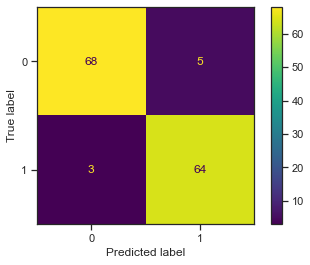

In [30]:
# Decision tree classifier - Confusion Matrix visualization.

dtc_cm = confusion_matrix(y_test, y_pred_en, labels=clf_en.classes_)
dtcdisp = ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=clf_en.classes_)
dtcdisp.plot()
plt.grid(False)
plt.show()

**Random forest (RF)**

In [31]:
# https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
# Make predictions for the test set
y_pred_test = forest.predict(x_test)

# Random forest accuracy

rf_acc = round((accuracy_score(y_test, y_pred_test))*100,2)
print("Random forest accuracy:", rf_acc)
print()

# Random forest precision

rf_prec = np.round((precision_score(y_test, y_pred_test, average=None))*100,2)
print("Random forest precision:", rf_prec)
print()

# Random forest recall

rf_rec = np.round((recall_score(y_test, y_pred_test, average=None))*100,2)
print("Random forest recall:", rf_rec)
print()

# Random forest f1

rf_f1 = np.round((f1_score(y_test, y_pred_test, average=None))*100,2)
print("Random forest f1:", rf_f1)
print()

# Random forest - Matthews correlation coefficient (MCC)

rf_mcc = np.round((round(matthews_corrcoef(y_test, y_pred_test),2))*100,2)
print("Random forest MCC:", rf_mcc)

Random forest accuracy: 98.57

Random forest precision: [100.   97.1]

Random forest recall: [ 97.26 100.  ]

Random forest f1: [98.61 98.53]

Random forest MCC: 97.0


In [32]:
# Random forest classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.97      1.00      0.99        67

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



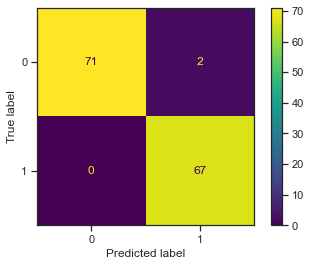

In [33]:
# Random forest - Confusion Matrix visualization.

rf_cm = confusion_matrix(y_test, y_pred_test, labels=forest.classes_)
rfdisp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=forest.classes_)
rfdisp.plot()
plt.grid(False)
plt.show()

**Neural Networks (NNET)**

In [34]:
# https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000)
mlp.fit(x_train,y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

# NNET accuracy

nn_acc = round((accuracy_score(y_test, predict_test))*100,2)
print("NNET accuracy:", nn_acc)
print()

# NNET precision

nn_prec = np.round((precision_score(y_test, predict_test, average=None))*100,2)
print("NNET precision:", nn_prec)
print()

# NNET recall

nn_rec = np.round((recall_score(y_test, predict_test, average=None))*100,2)
print("NNET precision:", nn_rec)
print()

# NNET f1

nn_f1 = np.round((f1_score(y_test, predict_test, average=None))*100,2)
print("NNET precision:",nn_f1)
print()

# NNET - Matthews correlation coefficient (MCC)

nn_mcc = (round(matthews_corrcoef(y_train,predict_train),2))*100
print("NNET precision:", nn_mcc)

NNET accuracy: 92.86

NNET precision: [94.37 91.3 ]

NNET precision: [91.78 94.03]

NNET precision: [93.06 92.65]

NNET precision: 86.0


In [35]:
# NNET classification report
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       139
           1       0.95      0.91      0.93       145

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



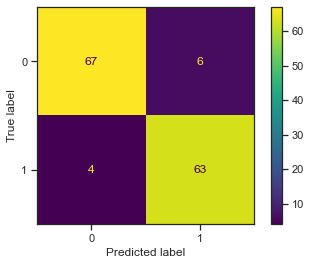

In [36]:
# NNET - Confusion Matrix visualization.

nn_cm = confusion_matrix(y_test, predict_test, labels=mlp.classes_)
nndisp = ConfusionMatrixDisplay(confusion_matrix=nn_cm, display_labels=mlp.classes_)
nndisp.plot()
plt.grid(False)
plt.show()

**Naive Bayes**

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_nbpred = gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

# Naive Bayes accuracy

nb_acc = round((accuracy_score(y_test,gnb_pred))*100,2)
print("Naive bayes accuracy:", nb_acc)
print()

# Naive Bayes precision

nb_prec = np.round((precision_score(y_test, gnb_pred, average=None))*100,2)
print("Naive bayes precision:", nb_prec)
print()

# Naive Bayes recall

nb_rec = np.round((recall_score(y_test, gnb_pred, average=None))*100,2)
print("Naive bayes recall:", nb_rec)
print()

# Naive Bayes f1

nb_f1 = np.round((f1_score(y_test, gnb_pred, average=None))*100,2)
print("Naive bayes f1:", nb_f1)
print()

# Naive Bayes- Matthews correlation coefficient (MCC)

nb_mcc = (round(matthews_corrcoef(y_test, gnb_pred),2))*100
print("Naive bayes MCC:", nb_mcc)

Naive bayes accuracy: 95.0

Naive bayes precision: [93.42 96.88]

Naive bayes recall: [97.26 92.54]

Naive bayes f1: [95.3  94.66]

Naive bayes MCC: 90.0


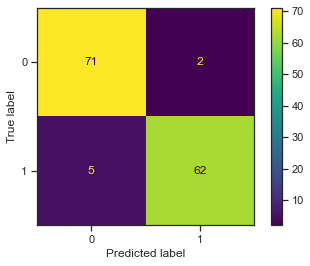

In [38]:
# Naive Bayes - Confusion Matrix visualization.

nb_cm = confusion_matrix(y_test, gnb_pred, labels=gnb.classes_)
nbdisp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=gnb.classes_)
nbdisp.plot()
plt.grid(False)
plt.show()

In [39]:
#file:///C:/Users/ROB/Downloads/monther,+12300-Article+Text-36825-1-6-20210211-1.pdf

In [40]:
# https://www.scirp.org/pdf/OALibJ_2016031015403611.pdf

In [41]:
knn_acc
nb_acc
nn_acc
rf_acc
svc_acc
dtc_acc
lr_acc


95.71

**CLASSIFIERS ACCURACY COMPARISON**

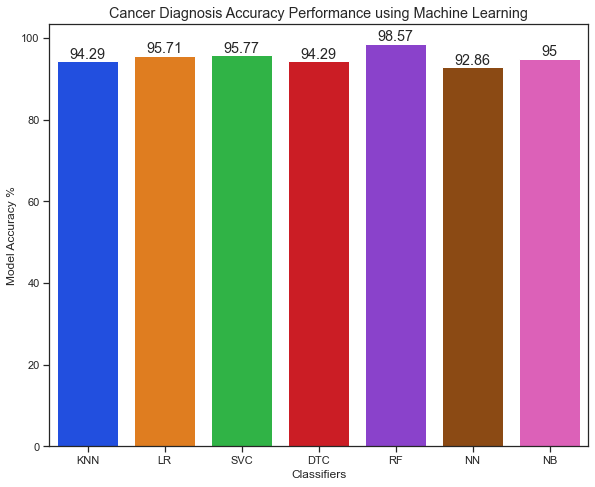

In [42]:
# Visualize model accuracies for comparision - bar will be appropriate to visualize 

acc_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
        "Model Accuracy %":[knn_acc, lr_acc, svc_acc, dtc_acc, rf_acc, nn_acc, nb_acc]
       }
    
accuracydf = pd.DataFrame(data=acc_data)

sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(8.5, 7))

sns.set(font_scale=1.2)

sns.barplot(data=accuracydf, x="Classifiers",y="Model Accuracy %", palette ="bright").set(title="Cancer Diagnosis Accuracy Performance using Machine Learning")

ax.bar_label(ax.containers[0])

plt.tight_layout()

**Matthews correlation coefficient COMPARISON**

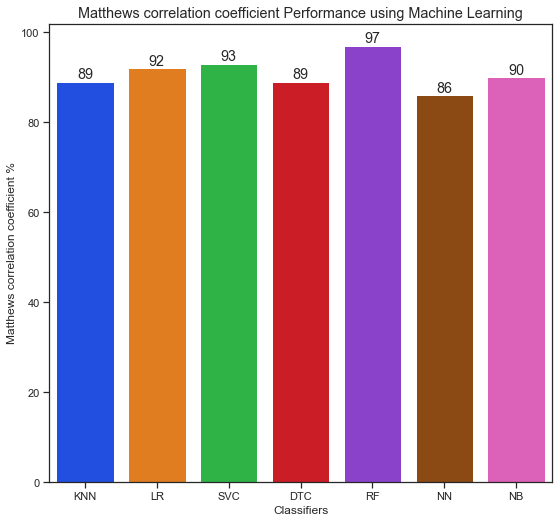

In [43]:
mcc_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
            "Matthews correlation coefficient %":[knn_mcc, lr_mcc, svc_mcc, dtc_mcc, rf_mcc, nn_mcc, nb_mcc]
       }
    
mccdf = pd.DataFrame(data=mcc_data)

sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(8, 7.5))

sns.set(font_scale=1.2)

sns.barplot(data=mccdf, x="Classifiers",y="Matthews correlation coefficient %",palette ="bright").set(title="Matthews correlation coefficient Performance using Machine Learning")

ax.bar_label(ax.containers[0])

plt.tight_layout()

**PRECISION COMPARISON**

In [44]:
prec_comp = [knn_prec, lr_prec, svc_prec, dtc_prec, rf_prec, nn_prec, nb_prec]

pzero = []
pone = []

for i in prec_comp:
    p0 = i.item(0)
    p1 = i.item(1)
    pzero.append(p0)
    pone.append(p1)

a = np.array(pzero)
b = np.array(pone)

preczero_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
            "Precision B %":a,
            "Precision M %":b
       }

precdf = round(pd.DataFrame(data=preczero_data),2)
precdf

,Classifiers,Precision B %,Precision M %
0,KNN,97.10,91.55
1,LR,100.00,91.78
2,SVC,100.00,93.06
3,DTC,95.77,92.75
4,RF,100.00,97.10
5,NN,94.37,91.30
6,NB,93.42,96.88


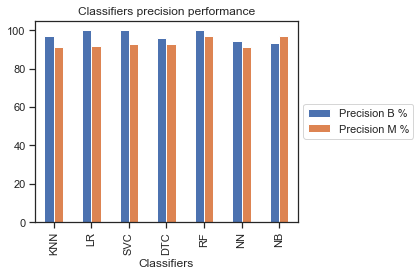

In [45]:
# plotting graph
sns.set(style="ticks")
precdf.plot(x="Classifiers", y=["Precision B %", "Precision M %"], kind="bar")
plt.title("Classifiers precision performance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()

**RECALL COMPARISON**

In [46]:
recall_comp = [knn_rec, lr_rec, svc_rec, dtc_rec, rf_rec, nn_rec, nb_rec]

reczero = []
recone = []

for i in recall_comp:
    r0 = i.item(0)
    r1 = i.item(1)
    reczero.append(r0)
    recone.append(r1)

c = np.array(reczero)
d = np.array(recone)

recall_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
            "Recall B %":c,
            "Recall M %":d
       }

recalldf = round(pd.DataFrame(data=recall_data),2)
recalldf

,Classifiers,Recall B %,Recall M %
0,KNN,91.78,97.01
1,LR,91.78,100.00
2,SVC,93.15,100.00
3,DTC,93.15,95.52
4,RF,97.26,100.00
5,NN,91.78,94.03
6,NB,97.26,92.54


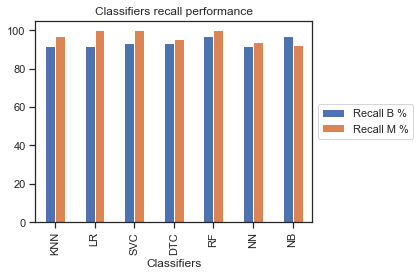

In [47]:
# plotting graph
sns.set(style="ticks")
recalldf.plot(x="Classifiers", y=["Recall B %", "Recall M %"], kind="bar")
plt.title("Classifiers recall performance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()

**f1 COMPARISON**

In [48]:
f1_comp = [knn_f1, lr_f1, svc_f1, dtc_f1, rf_f1, nn_f1, nb_f1]

fzero = []
fone = []

for i in f1_comp:
    f0 = i.item(0)
    f1 = i.item(1)
    fzero.append(f0)
    fone.append(f1)

e = np.array(fzero)
f = np.array(fone)

f1_data = {"Classifiers":["KNN","LR","SVC","DTC","RF","NN","NB"],
            "f1 B %":e,
            "f1 M %":f
       }

f1df = np.round(pd.DataFrame(data=f1_data),2)
f1df

,Classifiers,f1 B %,f1 M %
0,KNN,94.37,94.20
1,LR,95.71,95.71
2,SVC,96.45,96.40
3,DTC,94.44,94.12
4,RF,98.61,98.53
5,NN,93.06,92.65
6,NB,95.30,94.66


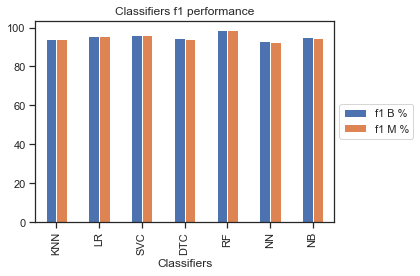

In [49]:
# plotting graph
sns.set(style="ticks")
f1df.plot(x="Classifiers", y=["f1 B %", "f1 M %"], kind="bar")
plt.title("Classifiers f1 performance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()

**EXPANDING THE DATASET WITH SYNTHETIC DATA**

In [50]:
# we need to add 145 samples
# coger el dataset M  y anadir 145 muestras basado en las que ya hay

In [51]:
import imblearn

In [52]:
from imblearn.over_sampling import RandomOverSampler

In [53]:
from imblearn.over_sampling import SMOTE

In [142]:
# Hemos partido del dataset original 

ex = ds.drop(['diagnosis'], axis = 1)
ey = ds['diagnosis']

In [143]:
print(ey.value_counts()["1"])
print(ey.value_counts()["0"])

212
357


In [149]:
np.unique(ey, return_counts=True)

(array(['0', '1'], dtype=object), array([357, 212], dtype=int64))

In [145]:
# Hacemos el train set split

ex_train, ex_test, ey_train, ey_test = train_test_split(ex, ey, test_size = 0.33, random_state = 10)

In [147]:
# Comprobamos que hay imabalance
# # https://www.sharpsightlabs.com/blog/numpy-unique/

np.unique(ey_train, return_counts=True)

(array(['0', '1'], dtype=object), array([233, 148], dtype=int64))

In [148]:
np.unique(ey_test, return_counts=True)

(array(['0', '1'], dtype=object), array([124,  64], dtype=int64))

In [151]:
# Comprobamos como afecta el imbalance al resultado

logisticRegr = LogisticRegression(max_iter=5000)
logisticRegr.fit(ex_train, ey_train)
epred_lr = logisticRegr.predict(ex_test)

print(classification_report(ey_test,epred_lr))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       124
           1       0.90      0.97      0.93        64

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188



In [152]:
# y_train

print(ey_train.value_counts()["1"])
print(ey_train.value_counts()["0"])

148
233


In [153]:
# y_test

print(ey_test.value_counts()["1"])
print(ey_test.value_counts()["0"])

64
124


In [154]:
sm = SMOTE(random_state = 2)
oversample = SMOTE()
ex, ey = oversample.fit_resample(ex, ey)

In [155]:
ex_train_res, ey_train_res = sm.fit_resample(ex_train, ey_train.ravel())

In [156]:
ey_train_res.shape

(466,)

In [157]:
# https://www.sharpsightlabs.com/blog/numpy-unique/
np.unique(ey_train_res, return_counts=True)

(array(['0', '1'], dtype=object), array([233, 233], dtype=int64))

In [124]:
#pd.DataFrame.describe(x_train_res)

In [158]:
logisticRegr = LogisticRegression(max_iter=5000)
logisticRegr.fit(ex_train_res, ey_train_res)
epred_lr_res = logisticRegr.predict(ex_test)

In [160]:
# Resampled data

print(classification_report(ey_test,epred_lr_res))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       124
           1       0.90      0.97      0.93        64

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188



In [161]:
# Old data 

print(classification_report(ey_test,epred_lr))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       124
           1       0.90      0.97      0.93        64

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188



In [162]:
# adding synthetic data guide

#https://datagen.tech/guides/synthetic-data/synthetic-data/

In [166]:
# Generative Adversarial Networks (GAN)

user@pc:~$ conda create -n pytorch_p37 python=3.7

SyntaxError: invalid syntax (Temp/ipykernel_17684/2320976470.py, line 3)

In [164]:
import torch.nn as nn

ModuleNotFoundError: No module named 'torch'